# Object Detection

- Image classification vs Object detection vs Image Segmentation
<br>
- How does object detection work?
  - Input image --> Trained object detection model --> Label, Confidence, Bounding boxes for each object.
<br>
- SSD-MobileNet V3 Pretrained Model (Single-Shot Detection + MobileNet)
  - Download weights and hyperparam config files of the pretrained model from the OpenCV GitHub Tensorflow Object Detection API: https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
  - Download the class label file of the COCO dataset (80 categories): https://github.com/pjreddie/darknet/blob/master/data/coco.names
<br>
- Advantages: fast, no GPU required for deep learning.
- Disadvantages: fair accuracy, adhere to certain object categories.
<br>
- Image used: https://unsplash.com/photos/tokYjYqaPB0
<br>
- Video used:https://www.youtube.com/watch?v=0lYxVnbcOkY

# Load Pretrained Model

In [1]:
import time
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# extract zipped file

!tar -xvzf .\ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz -C .\

x ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001
x ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite
x ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb
x ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta
x ssd_mobilenet_v3_large_coco_2020_01_14/


In [3]:
# paths

model_config = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt.txt'
model_weights = './ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'
label_names = './coco.names.txt'

In [4]:
# load labels

ls_label_names = []
with open(label_names, 'r') as txt_file:
    ls_label_names = txt_file.read().rstrip('\n').split('\n')

In [5]:
len(ls_label_names)

80

In [6]:
ls_label_names

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
# load pretrained model

model = cv2.dnn_DetectionModel(model_weights, model_config)

# Detect Objects in an Image

In [8]:
# load image

img = cv2.imread('./bicycle.jpg')

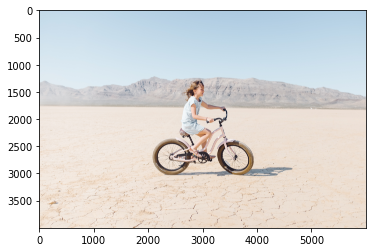

In [9]:
# convert to RGB 

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

Photo by NeONBRAND on Unsplash: https://unsplash.com/photos/tokYjYqaPB0

In [10]:
# set input config for the model

model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 000001D045721D90>

In [11]:
# test model

detect_class, detect_conf, detect_bbox = model.detect(frame=img, confThreshold=0.6)

In [12]:
# draw bounding box and put text for every detected object

for class_id, conf, bbox in zip(detect_class.flatten(), detect_conf.flatten(), detect_bbox):

    # display bounding box
    cv2.rectangle(img_RGB, bbox, (0, 255, 0), 10)
        
    # display label name
    label_name = ls_label_names[class_id-1]
    text = f"{label_name}: {conf * 100:.2f}%"
    cv2.putText(img=img_RGB, 
                text=text, 
                org=(bbox[0]+50, bbox[1]+100), 
                fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale = 5,
                color=(0, 0, 255), thickness=10)

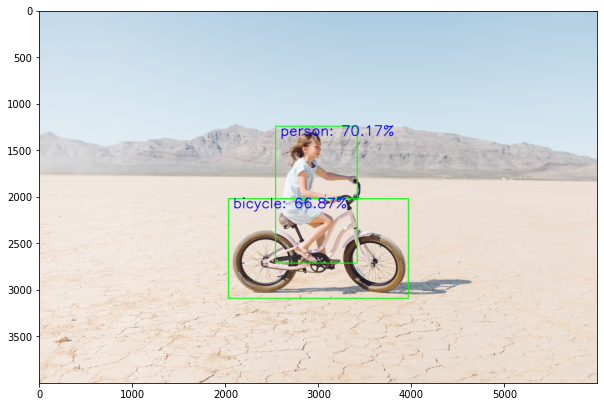

In [13]:
# display image

fig = plt.figure(figsize=(10, 8))  # size by inches
ax = fig.add_subplot(111)
ax.imshow(img_RGB)

# Detect Objects in a Video File

In [14]:
# capture video from default camera
video_frames = cv2.VideoCapture('./music-video.mp4')  # 0: default camera

# get frame size from camera
frame_width = int(video_frames.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_frames.get(cv2.CAP_PROP_FRAME_HEIGHT))

# initialize writer
# fourcc: video codec. DIVX for windows, XVID for linux and macOS
# fps: 30
writer = cv2.VideoWriter('./music-video-obj-detection.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))   
 
# loop: grab frame and display image
while True:
    # read frames
    ret, frame = video_frames.read()
    
    # object detection
    detect_class, detect_conf, detect_bbox = model.detect(frame=frame, confThreshold=0.6)
    
    # draw bounding box and put text for every detected object
    if (len(detect_class) > 0):
        for class_id, conf, bbox in zip(detect_class.flatten(), detect_conf.flatten(), detect_bbox):
            # display bounding box
            cv2.rectangle(frame, bbox, (0, 255, 0), 5)

            # display label name
            label_name = ls_label_names[class_id-1]
            text = f"{label_name}: {conf * 100:.2f}%"
            cv2.putText(img=frame, 
                        text=text, 
                        org=(bbox[0]+50, bbox[1]+100), 
                        fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale = 2,
                        color=(0, 0, 255), thickness=5)
    
    # save video
    writer.write(frame)
    
    # show frame
    cv2.imshow('frame', frame)
    
    # if frame is display for more than 1 ms and ESC key is pressed, close display
    if cv2.waitKey(1) & 0xFF == 27:
        break

video_frames.release()
writer.release()
cv2.destroyAllWindows()

# Detect Objects on Live Camera

In [16]:
# capture video from default camera
video_frames = cv2.VideoCapture(0)  # 0: default camera

# get frame size from camera
frame_width = int(video_frames.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_frames.get(cv2.CAP_PROP_FRAME_HEIGHT))

# initialize writer
# fourcc: video codec. DIVX for windows, XVID for linux and macOS
# fps: 30
writer = cv2.VideoWriter('./live-cam-obj-detection.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))   
 
# loop: grab frame and display image
while True:
    # read frames
    ret, frame = video_frames.read()
    
    # object detection
    detect_class, detect_conf, detect_bbox = model.detect(frame=frame, confThreshold=0.6)
    
    # draw bounding box and put text for every detected object
    if (len(detect_class) > 0):
        for class_id, conf, bbox in zip(detect_class.flatten(), detect_conf.flatten(), detect_bbox):
            # display bounding box
            cv2.rectangle(frame, bbox, (0, 255, 0), 5)

            # display label name
            label_name = ls_label_names[class_id-1]
            text = f"{label_name}: {conf * 100:.2f}%"
            cv2.putText(img=frame, 
                        text=text, 
                        org=(bbox[0]+50, bbox[1]+100), 
                        fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale = 2,
                        color=(0, 0, 255), thickness=5)
    
    # save video
    writer.write(frame)
    
    # show frame
    cv2.imshow('frame', frame)
    
    # if frame is display for more than 1 ms and ESC key is pressed, close display
    if cv2.waitKey(1) & 0xFF == 27:
        break

video_frames.release()
writer.release()
cv2.destroyAllWindows()